In [42]:
import sys
sys.path.insert(1, '../../../../utils')
import numpy as np
from numpy import log, ndarray, array, mean, sqrt, arange
from pandas import read_csv, DataFrame, Series, to_timedelta, date_range, to_datetime
from matplotlib.pyplot import figure, savefig, show, subplots, plot, legend, setp
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from matplotlib.gridspec import GridSpec
import dslabs_functions
from dslabs_functions import plot_line_chart, HEIGHT, ts_aggregation_by, set_chart_labels, plot_components, plot_multiline_chart, \
series_train_test_split, plot_forecasting_series, plot_multibar_chart, FORECAST_MEASURES, plot_forecasting_eval, plot_forecasting_series, \
PersistenceOptimistRegressor, PersistenceRealistRegressor
from scipy.stats import norm, expon, lognorm
from seaborn import heatmap
from statsmodels.tsa.stattools import adfuller
from sklearn.base import RegressorMixin
from sklearn.linear_model import LinearRegression

In [43]:
target = "Inflation Rate (%)"
chart_target="inflation"
filename = "../../data/raw/economic_indicators_dataset_2010_2023.csv"
file_tag = "Aggregation"
data: DataFrame = read_csv(filename, na_values="")
data["Date"] = to_datetime(data["Date"])
data = data.set_index("Date").sort_index()
usa_data = data[data["Country"] == "USA"]
series: Series = usa_data[target]

series.head()

Date
2010-01-31    7.46
2010-02-28    3.13
2010-03-31    7.20
2010-06-30    5.56
2011-01-31    0.09
Name: Inflation Rate (%), dtype: float64

**Train/Test Split**

In [44]:
# splits temporally, since we sorted by date above
train, test = series_train_test_split(series)
train.head()
test.head()

Date
2022-03-31    3.21
2022-06-30    7.71
2022-07-31    9.44
2022-07-31    2.20
2023-02-28    2.97
Name: Inflation Rate (%), dtype: float64

**MVI Analysis** - there are no missing values in the train or test set, verified below:

In [45]:
train.isna().sum(), test.isna().sum()

(np.int64(0), np.int64(0))

**Aggregation**

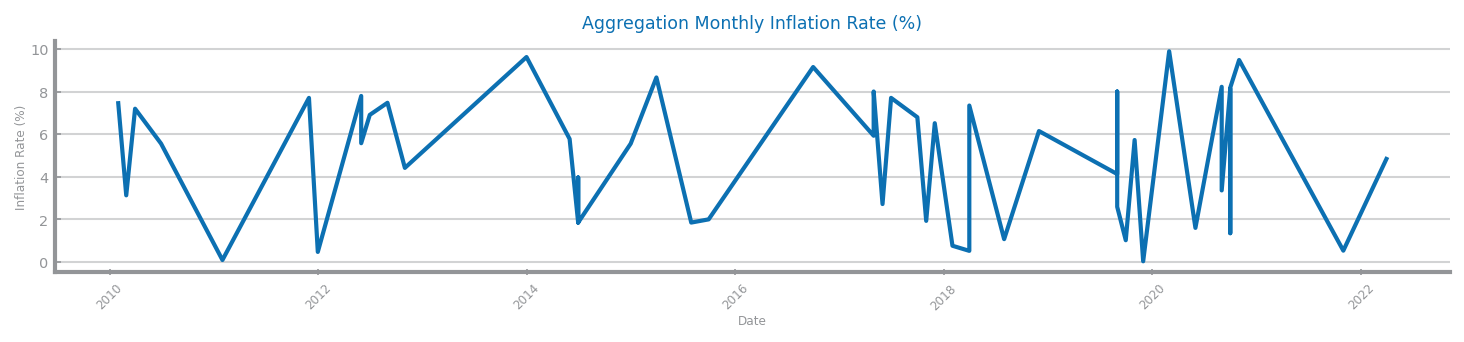

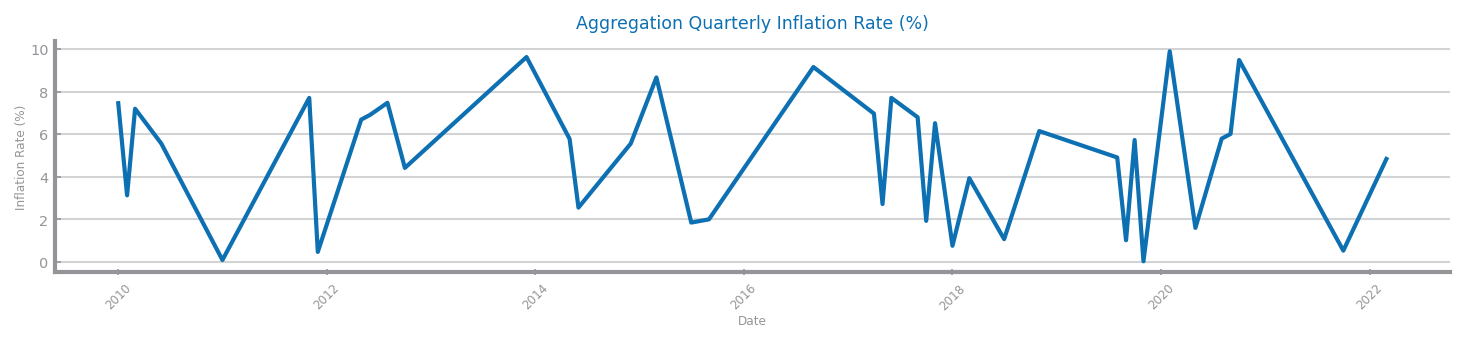

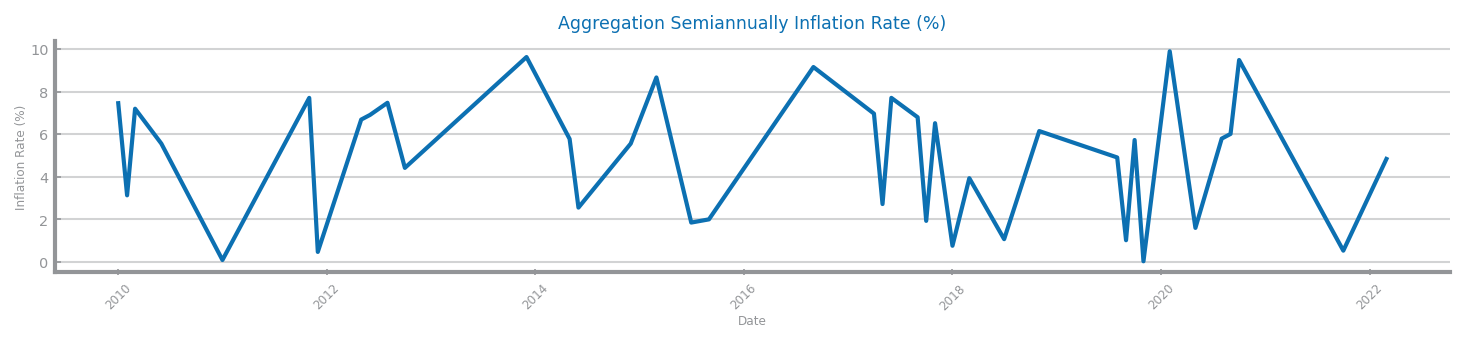

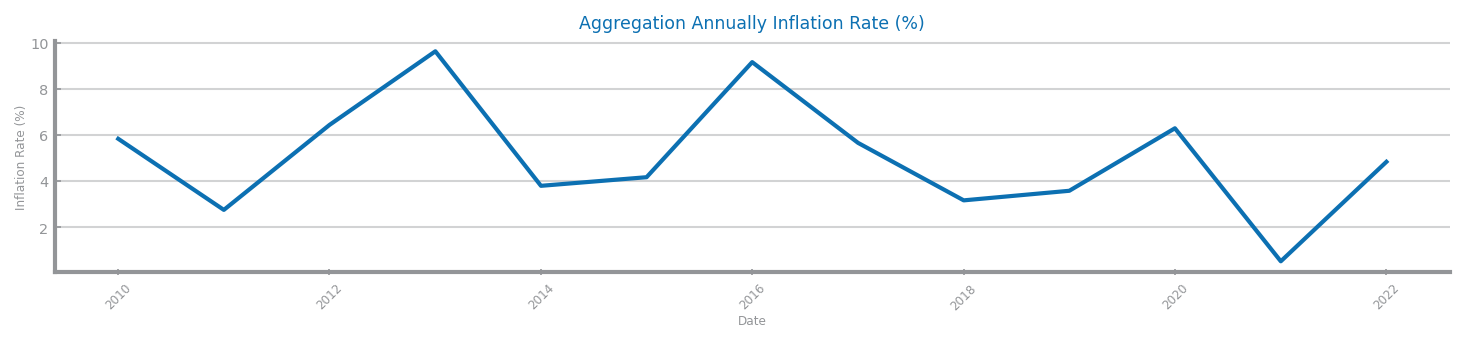

In [46]:
# trying aggregates of 3, 6, and 12 months

series_3M_train: Series = ts_aggregation_by(train, gran_level="3M", agg_func=mean)
series_3M_test: Series = ts_aggregation_by(test, gran_level="3M", agg_func=mean)
series_6M_train: Series = ts_aggregation_by(train, gran_level="6M", agg_func=mean)
series_6M_test: Series = ts_aggregation_by(test, gran_level="6M", agg_func=mean)
series_A_train: Series = ts_aggregation_by(train, gran_level="A", agg_func=mean)
series_A_test: Series = ts_aggregation_by(test, gran_level="A", agg_func=mean)

# plotting the training sets for each


figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    train.index.to_list(),
    train.to_list(),
    xlabel=train.index.name,
    ylabel=target,
    title=f"{file_tag} Monthly {target}",
)
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series_3M_train.index.to_list(),
    series_3M_train.to_list(),
    xlabel=series_3M_train.index.name,
    ylabel=target,
    title=f"{file_tag} Quarterly {target}",
)
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series_6M_train.index.to_list(),
    series_6M_train.to_list(),
    xlabel=series_6M_train.index.name,
    ylabel=target,
    title=f"{file_tag} Semiannually {target}",
)
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series_A_train.index.to_list(),
    series_A_train.to_list(),
    xlabel=series_A_train.index.name,
    ylabel=target,
    title=f"{file_tag} Annually {target}",
)
show()


**Evaluation**

**Persistent Optimist**

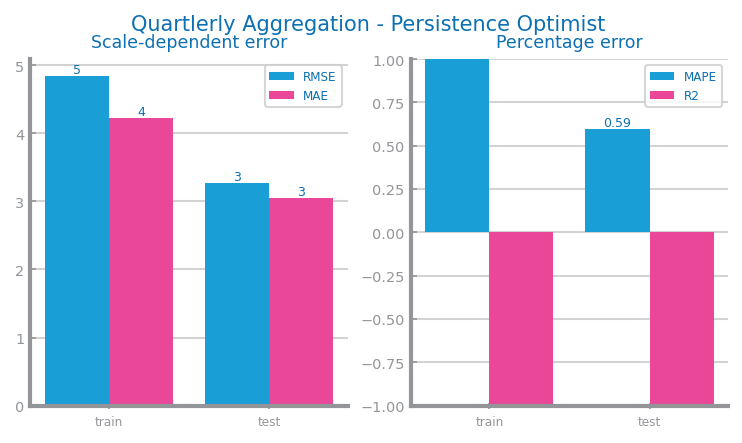

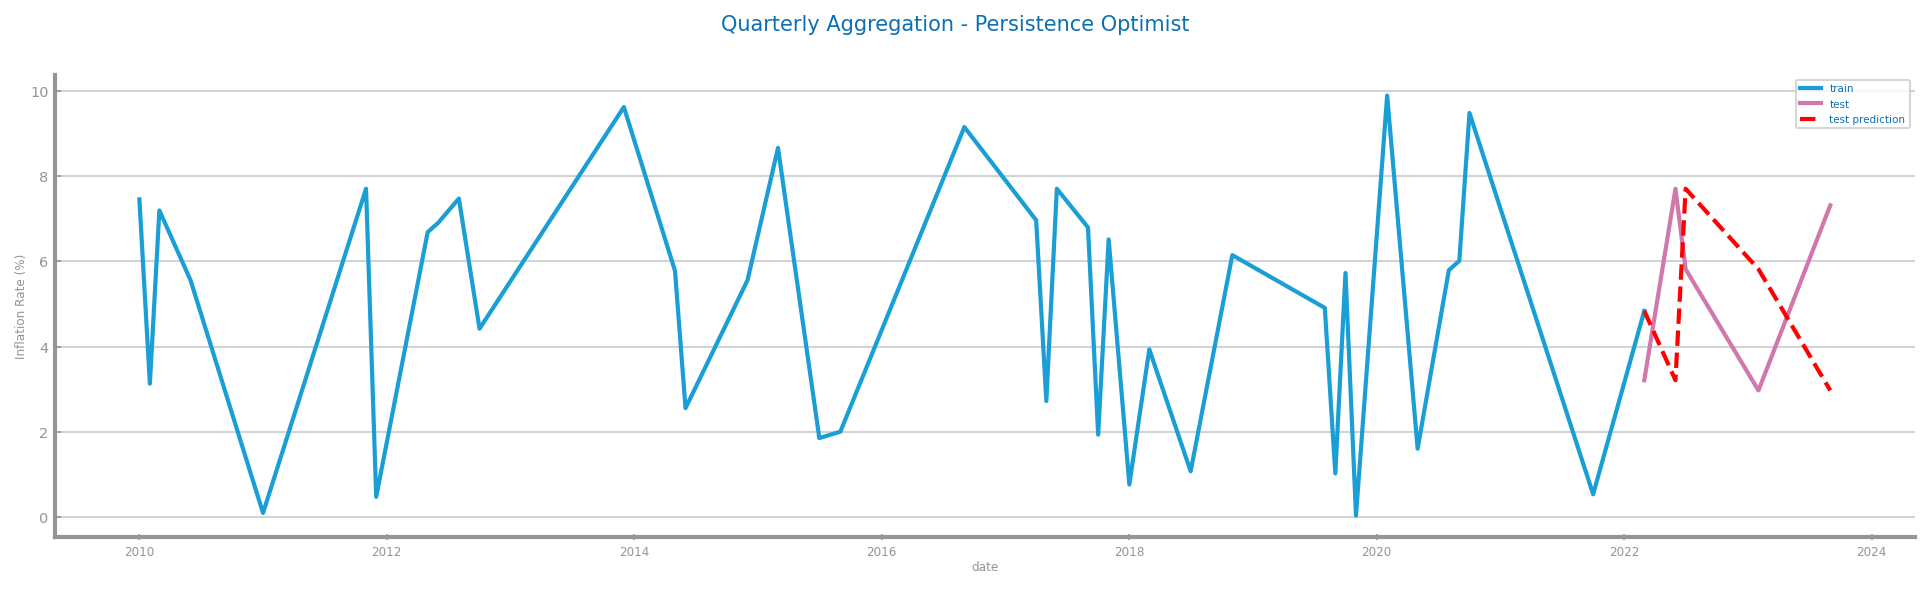

In [47]:
timecol="date"
fr_mod = PersistenceOptimistRegressor()
fr_mod.fit(series_3M_train)
prd_trn_3M: Series = fr_mod.predict(series_3M_train)
prd_tst_3M: Series = fr_mod.predict(series_3M_test)

plot_forecasting_eval(series_3M_train, series_3M_test, prd_trn_3M, prd_tst_3M, title=f"Quartlerly {file_tag} - Persistence Optimist")
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_persistence_optim_3M_eval.png")

plot_forecasting_series(
    series_3M_train,
    series_3M_test,
    prd_tst_3M,
    title=f"Quarterly {file_tag} - Persistence Optimist",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_persistence_optim_3M_forecast.png")



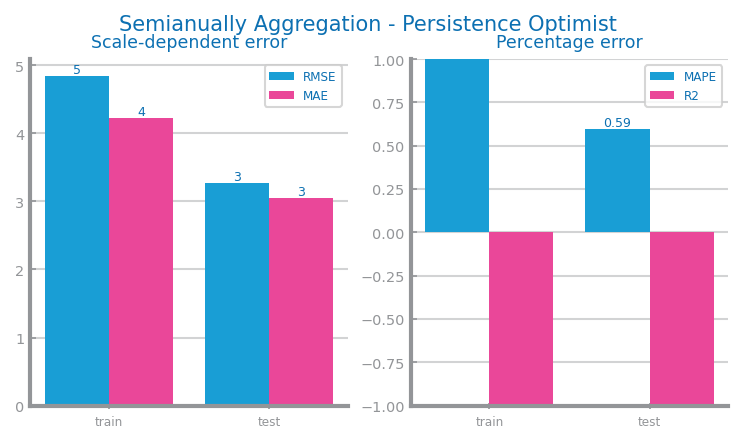

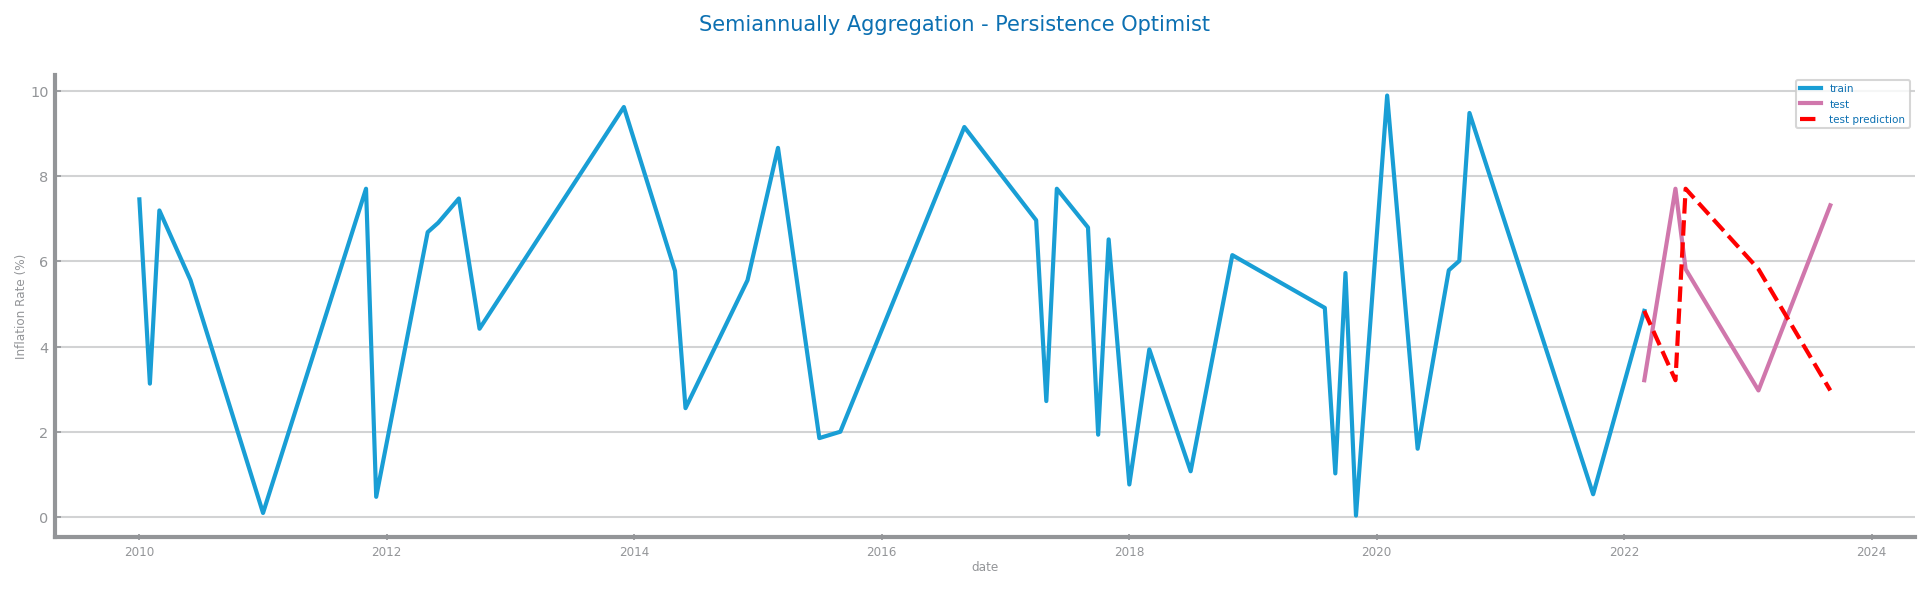

In [48]:
fr_mod = PersistenceOptimistRegressor()
fr_mod.fit(series_6M_train)
prd_trn_6M: Series = fr_mod.predict(series_6M_train)
prd_tst_6M: Series = fr_mod.predict(series_6M_test)

plot_forecasting_eval(series_6M_train, series_6M_test, prd_trn_6M, prd_tst_6M, title=f"Semianually {file_tag} - Persistence Optimist")
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_persistence_optim_6M_eval.png")

plot_forecasting_series(
    series_6M_train,
    series_6M_test,
    prd_tst_6M,
    title=f"Semiannually {file_tag} - Persistence Optimist",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_persistence_optim_6M_forecast.png")


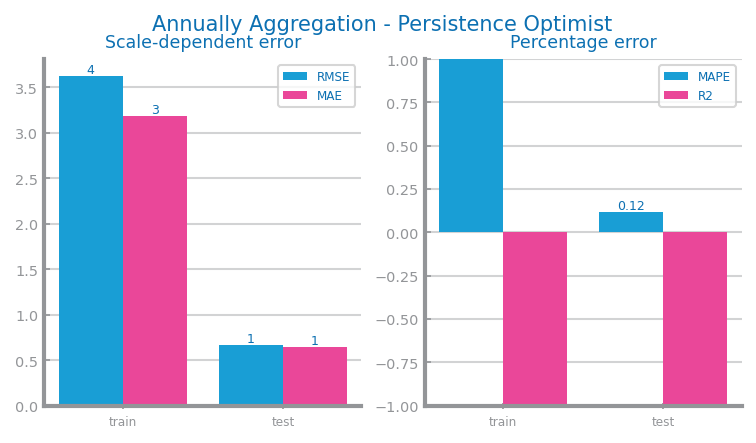

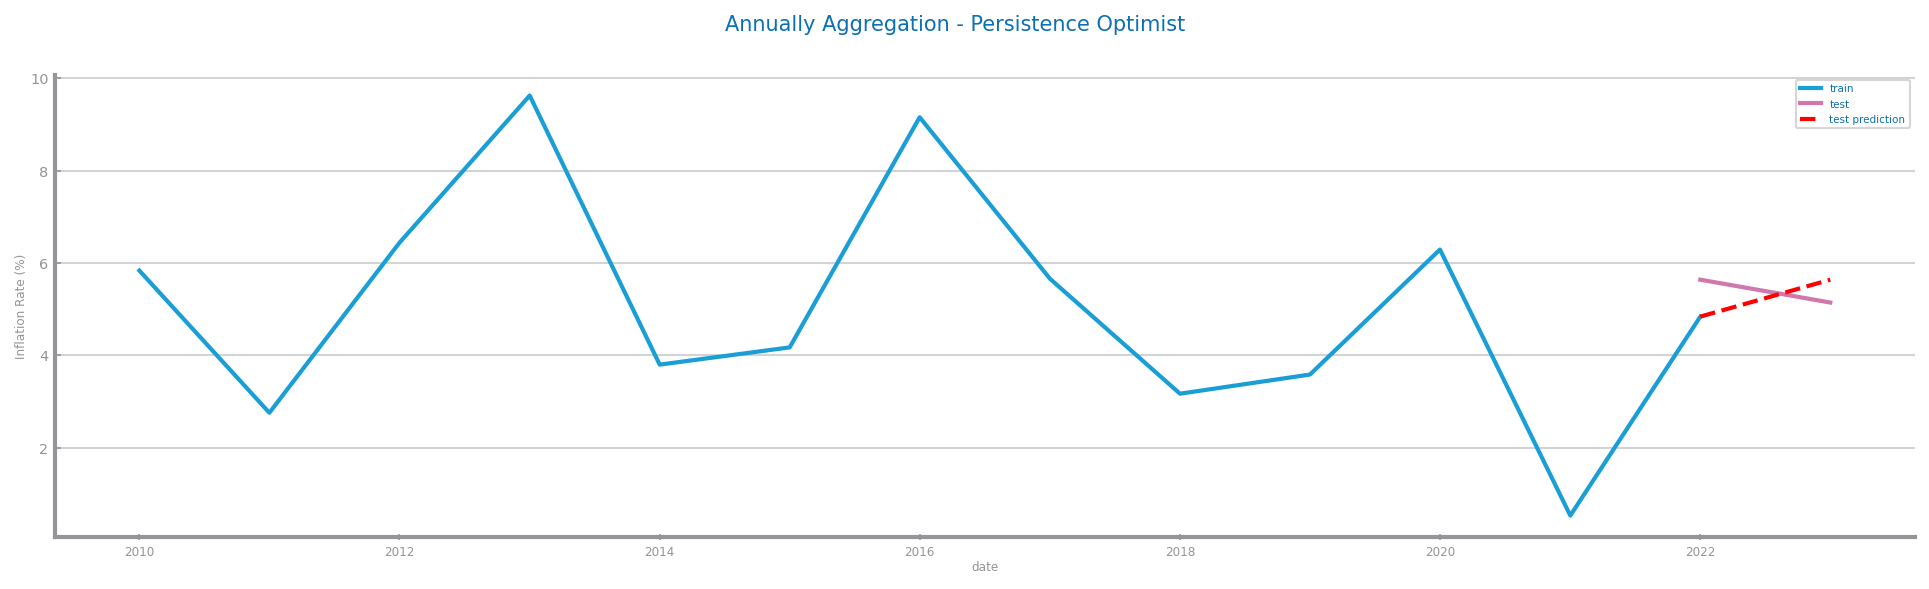

In [49]:
fr_mod = PersistenceOptimistRegressor()
fr_mod.fit(series_A_train)
prd_trn_A: Series = fr_mod.predict(series_A_train)
prd_tst_A: Series = fr_mod.predict(series_A_test)

plot_forecasting_eval(series_A_train, series_A_test, prd_trn_A, prd_tst_A, title=f"Annually {file_tag} - Persistence Optimist")
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_persistence_optim_A_eval.png")

plot_forecasting_series(
    series_A_train,
    series_A_test,
    prd_tst_A,
    title=f"Annually {file_tag} - Persistence Optimist",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_persistence_optim_A_forecast.png")


**Persistent Realist**

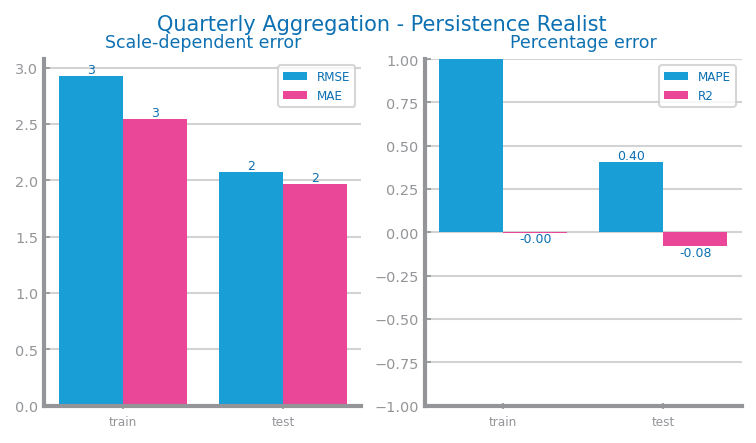

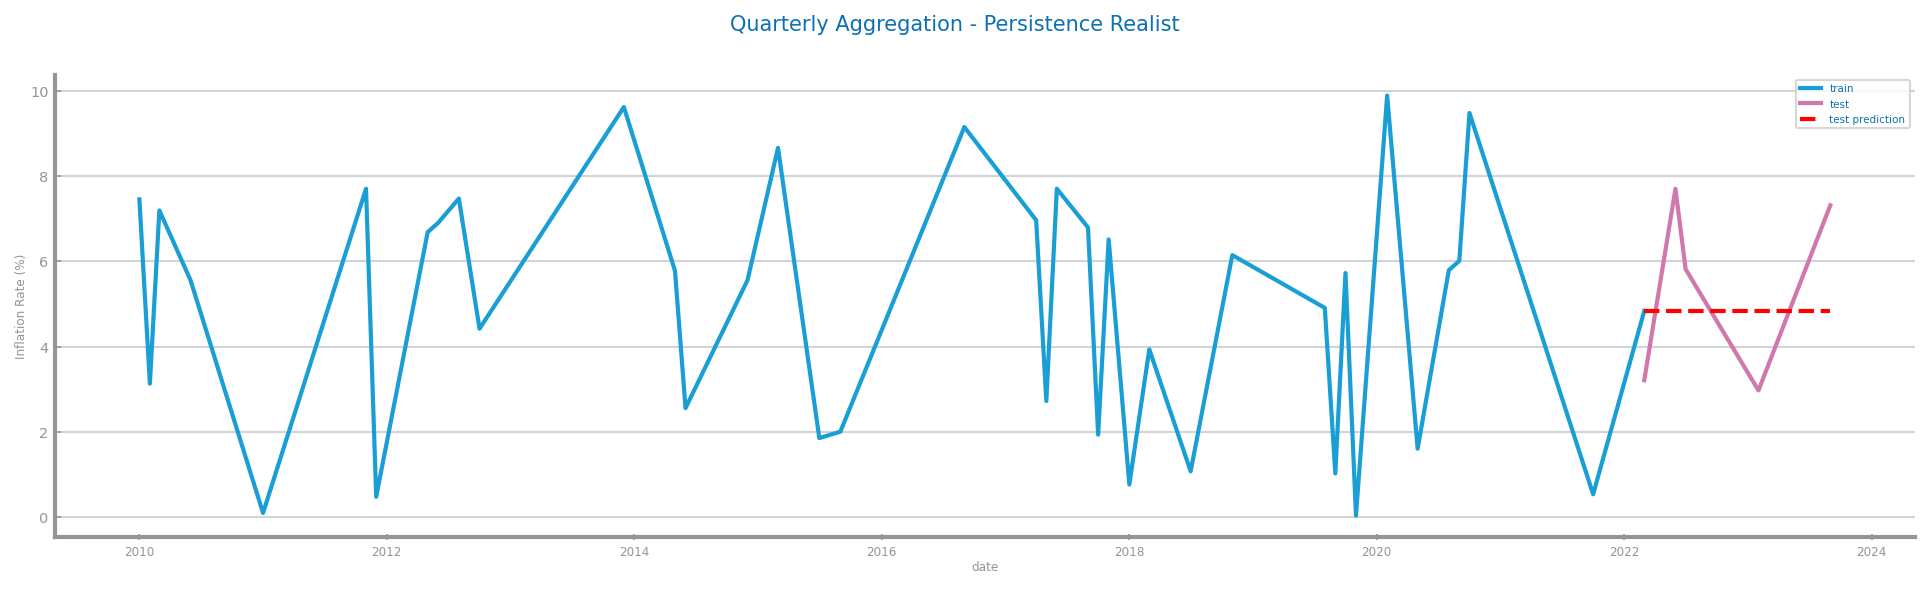

In [50]:
fr_mod = PersistenceRealistRegressor()
fr_mod.fit(series_3M_train)
prd_trn_3M: Series = fr_mod.predict(series_3M_train)
prd_tst_3M: Series = fr_mod.predict(series_3M_test)

plot_forecasting_eval(series_3M_train, series_3M_test, prd_trn_3M, prd_tst_3M, title=f"Quarterly {file_tag} - Persistence Realist")
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_persistence_real_3M_eval.png")

plot_forecasting_series(
    series_3M_train,
    series_3M_test,
    prd_tst_3M,
    title=f"Quarterly {file_tag} - Persistence Realist",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_persistence_real_3M_forecast.png")


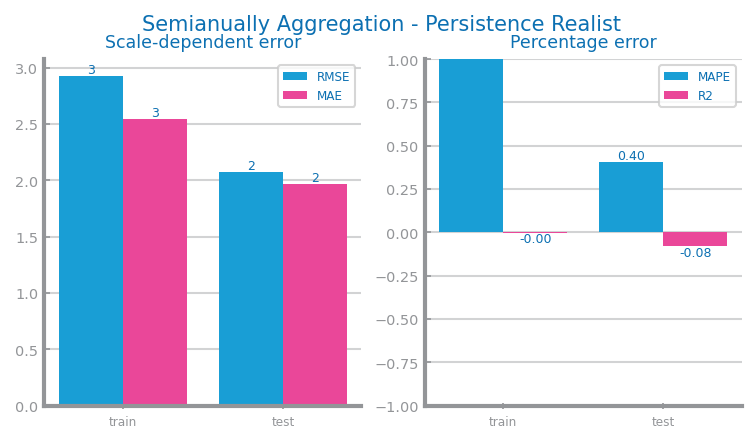

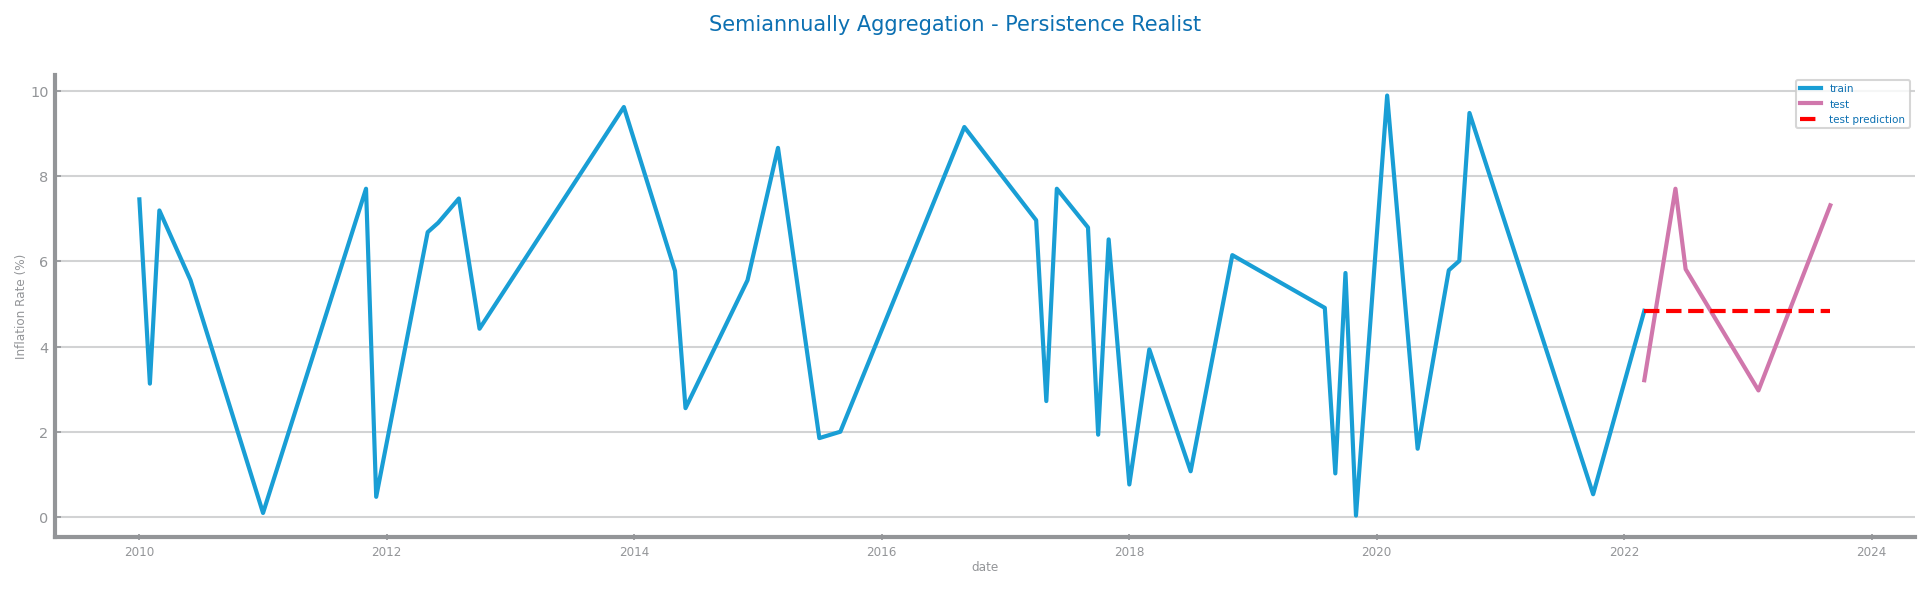

In [51]:
fr_mod = PersistenceRealistRegressor()
fr_mod.fit(series_6M_train)
prd_trn_6M: Series = fr_mod.predict(series_6M_train)
prd_tst_6M: Series = fr_mod.predict(series_6M_test)

plot_forecasting_eval(series_6M_train, series_6M_test, prd_trn_6M, prd_tst_6M, title=f"Semianually {file_tag} - Persistence Realist")
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_persistence_real_6M_eval.png")

plot_forecasting_series(
    series_6M_train,
    series_6M_test,
    prd_tst_6M,
    title=f"Semiannually {file_tag} - Persistence Realist",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_persistence_real_6M_forecast.png")


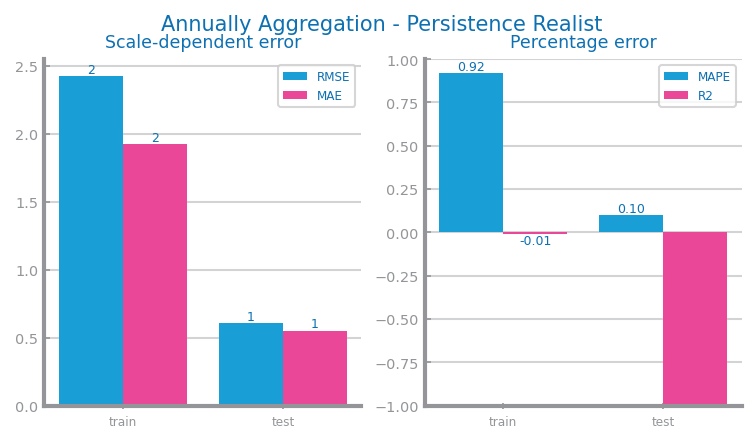

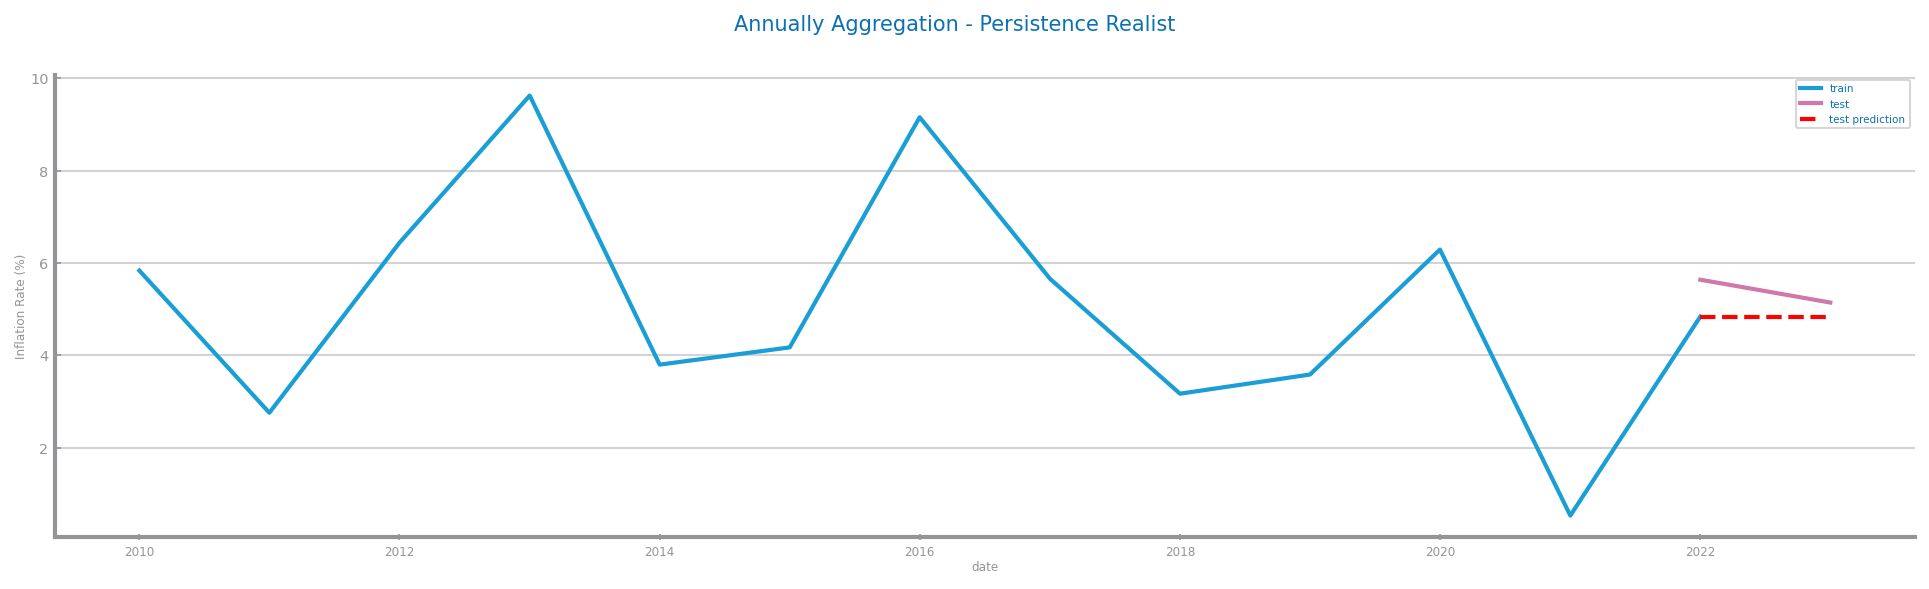

In [52]:
fr_mod = PersistenceRealistRegressor()
fr_mod.fit(series_A_train)
prd_trn_A: Series = fr_mod.predict(series_A_train)
prd_tst_A: Series = fr_mod.predict(series_A_test)

plot_forecasting_eval(series_A_train, series_A_test, prd_trn_A, prd_tst_A, title=f"Annually {file_tag} - Persistence Realist")
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_persistence_real_A_eval.png")

plot_forecasting_series(
    series_A_train,
    series_A_test,
    prd_tst_A,
    title=f"Annually {file_tag} - Persistence Realist",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_persistence_real_A_forecast.png")

**Linear Regression**

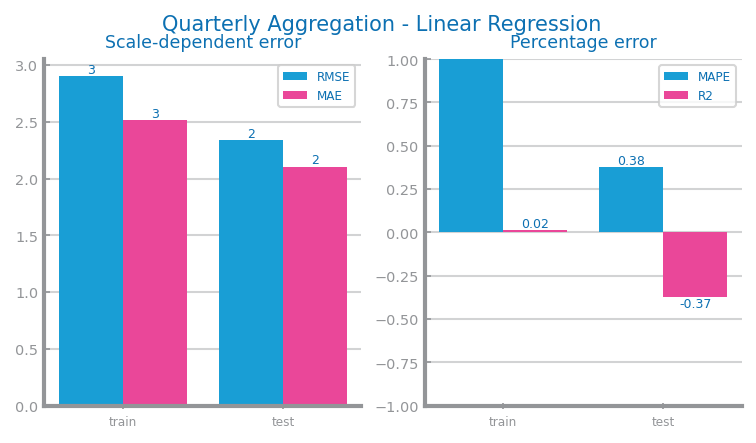

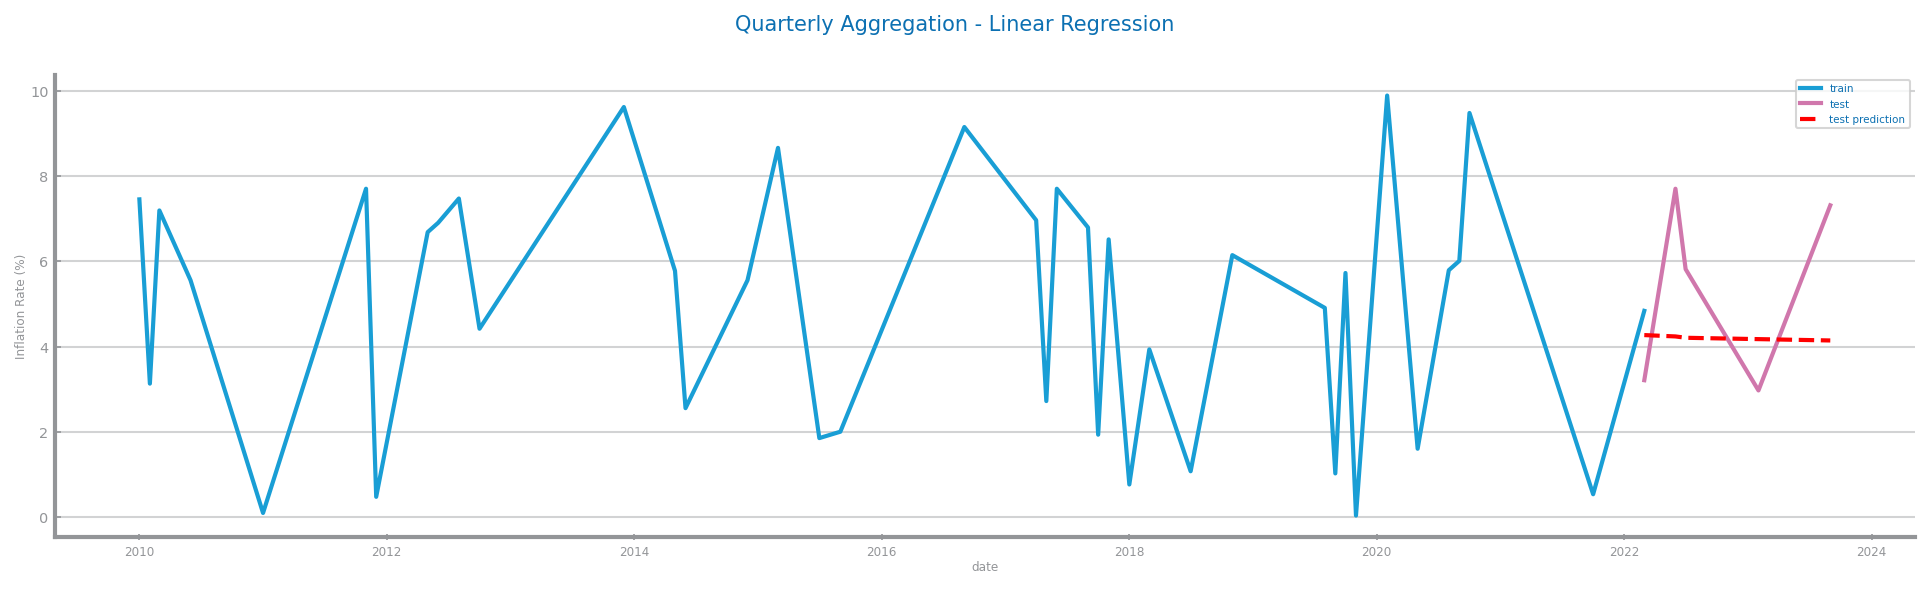

In [53]:
n_trn = len(series_3M_train)
n_tst = len(series_3M_test)

trnX = np.arange(n_trn).reshape(-1, 1)
trnY = series_3M_train.to_numpy()

tstX = np.arange(n_trn, n_trn + n_tst).reshape(-1, 1)
tstY = series_3M_test.to_numpy()

# Train model
model = LinearRegression()
model.fit(trnX, trnY)

prd_trn_3M: Series = Series(model.predict(trnX), index=series_3M_train.index)
prd_tst_3M: Series = Series(model.predict(tstX), index=series_3M_test.index)

plot_forecasting_eval(
    series_3M_train,
    series_3M_test,
    prd_trn_3M,
    prd_tst_3M,
    title=f"Quarterly {file_tag} - Linear Regression"
)
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_linear_regression_3M_eval.png")

plot_forecasting_series(
    series_3M_train,
    series_3M_test,
    prd_tst_3M,
    title=f"Quarterly {file_tag} - Linear Regression",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_linear_regression_3M_forecast.png")

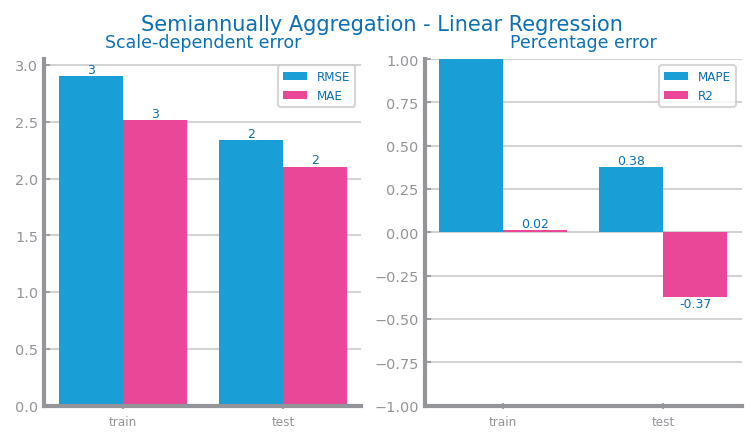

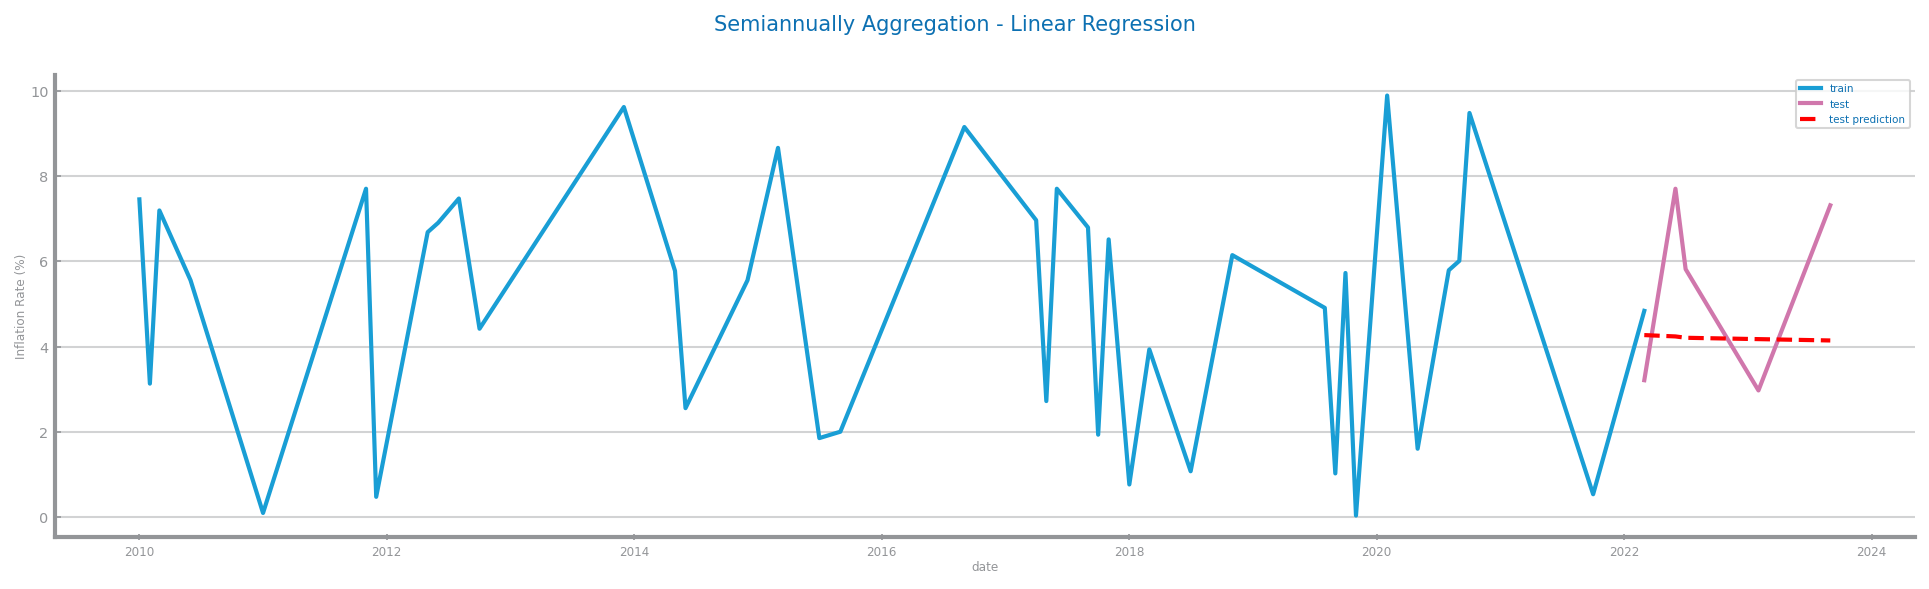

In [54]:
n_trn = len(series_6M_train)
n_tst = len(series_6M_test)

trnX = np.arange(n_trn).reshape(-1, 1)
trnY = series_6M_train.to_numpy()

tstX = np.arange(n_trn, n_trn + n_tst).reshape(-1, 1)
tstY = series_6M_test.to_numpy()

# Train model
model = LinearRegression()
model.fit(trnX, trnY)

prd_trn_6M: Series = Series(model.predict(trnX), index=series_6M_train.index)
prd_tst_6M: Series = Series(model.predict(tstX), index=series_6M_test.index)

plot_forecasting_eval(
    series_6M_train,
    series_6M_test,
    prd_trn_6M,
    prd_tst_6M,
    title=f"Semiannually {file_tag} - Linear Regression"
)
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_linear_regression_6M_eval.png")

plot_forecasting_series(
    series_6M_train,
    series_6M_test,
    prd_tst_6M,
    title=f"Semiannually {file_tag} - Linear Regression",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_linear_regression_6M_forecast.png")

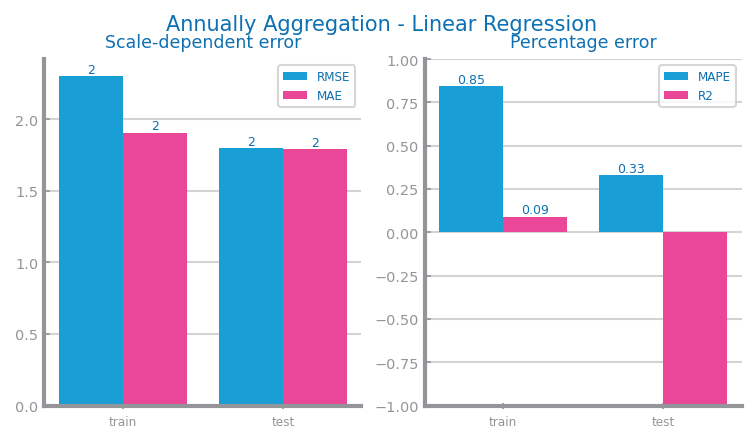

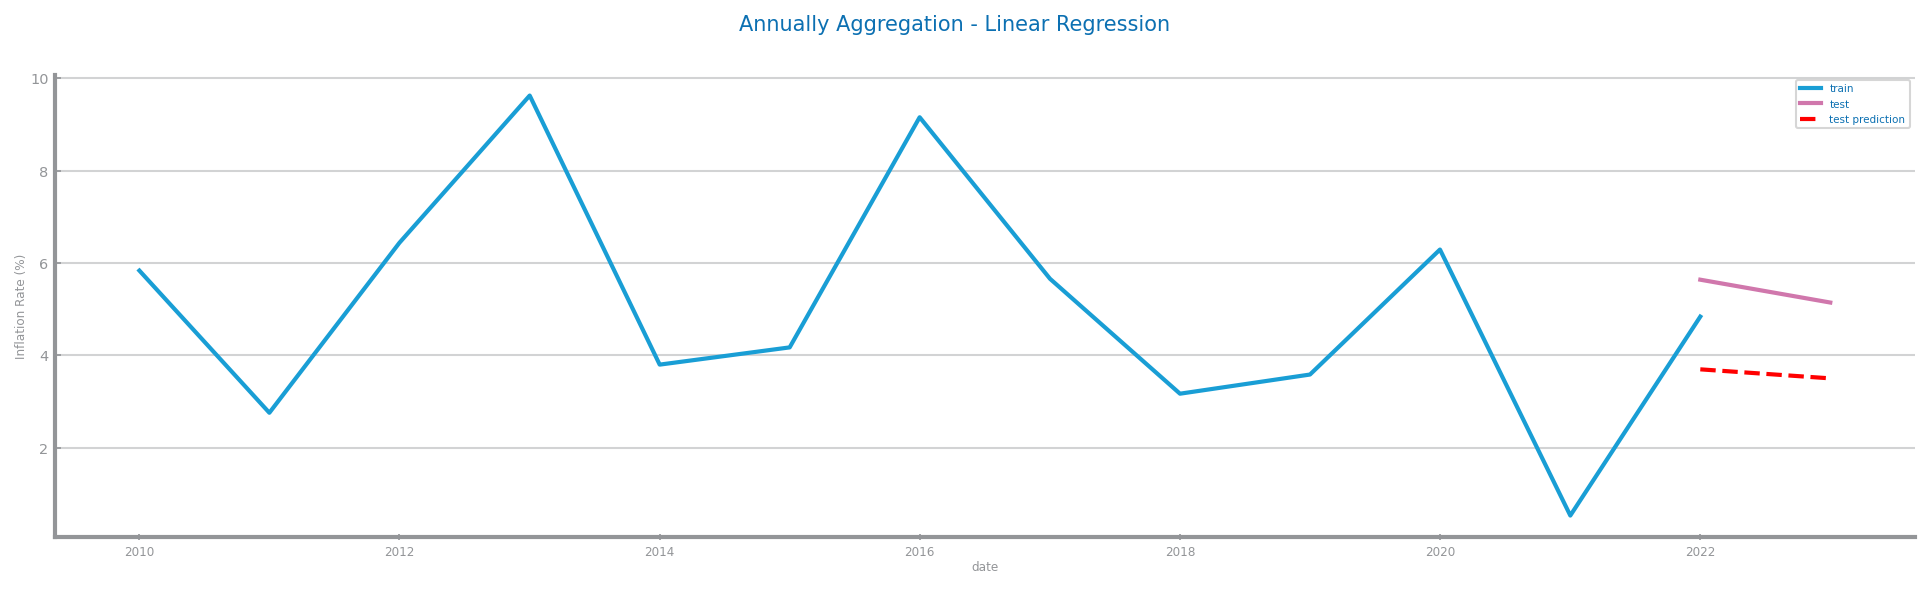

In [55]:
n_trn = len(series_A_train)
n_tst = len(series_A_test)

trnX = np.arange(n_trn).reshape(-1, 1)
trnY = series_A_train.to_numpy()

tstX = np.arange(n_trn, n_trn + n_tst).reshape(-1, 1)
tstY = series_A_test.to_numpy()

# Train model
model = LinearRegression()
model.fit(trnX, trnY)

prd_trn_A: Series = Series(model.predict(trnX), index=series_A_train.index)
prd_tst_A: Series = Series(model.predict(tstX), index=series_A_test.index)

plot_forecasting_eval(
    series_A_train,
    series_A_test,
    prd_trn_A,
    prd_tst_A,
    title=f"Annually {file_tag} - Linear Regression"
)
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_linear_regression_A_eval.png")

plot_forecasting_series(
    series_A_train,
    series_A_test,
    prd_tst_A,
    title=f"Annually {file_tag} - Linear Regression",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"../../charts/lab5/preparation/aggregation/{file_tag}_linear_regression_A_forecast.png")

**Evaluation Notes:**

Note that we can only directly compare the Persistent Realist model with the Linear Regression model.

For all aggregation techniques, the Persistent Realist model yields a lower RMSE than the Linear Regression Model for the test set. Among the Persistent Realist models, the Annual aggregation yields the lowest RSME for the test set (~1).

In [56]:
output_train_path = "../../data/prepared/aggregation/inflation_train_aggregation.csv"
output_test_path  = "../../data/prepared/aggregation/inflation_test_aggregation.csv"

# Ensure they are DataFrames so the index is preserved cleanly
series_A_train.to_frame(name="Inflation Rate (%)").to_csv(output_train_path)
series_A_test.to_frame(name="Inflation Rate (%)").to_csv(output_test_path)

print("Saved annual aggregated train/test sets.")

Saved annual aggregated train/test sets.
